## Цель работы
Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных
аддитивных цепочек для заданного числа, привить навык использования
систем компьютерной математики для реализации алгоритмов.

## Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной математики SageMath, провести анализ алгоритмов. Полученные результаты
содержательно проинтерпретировать.

## Номер 1:
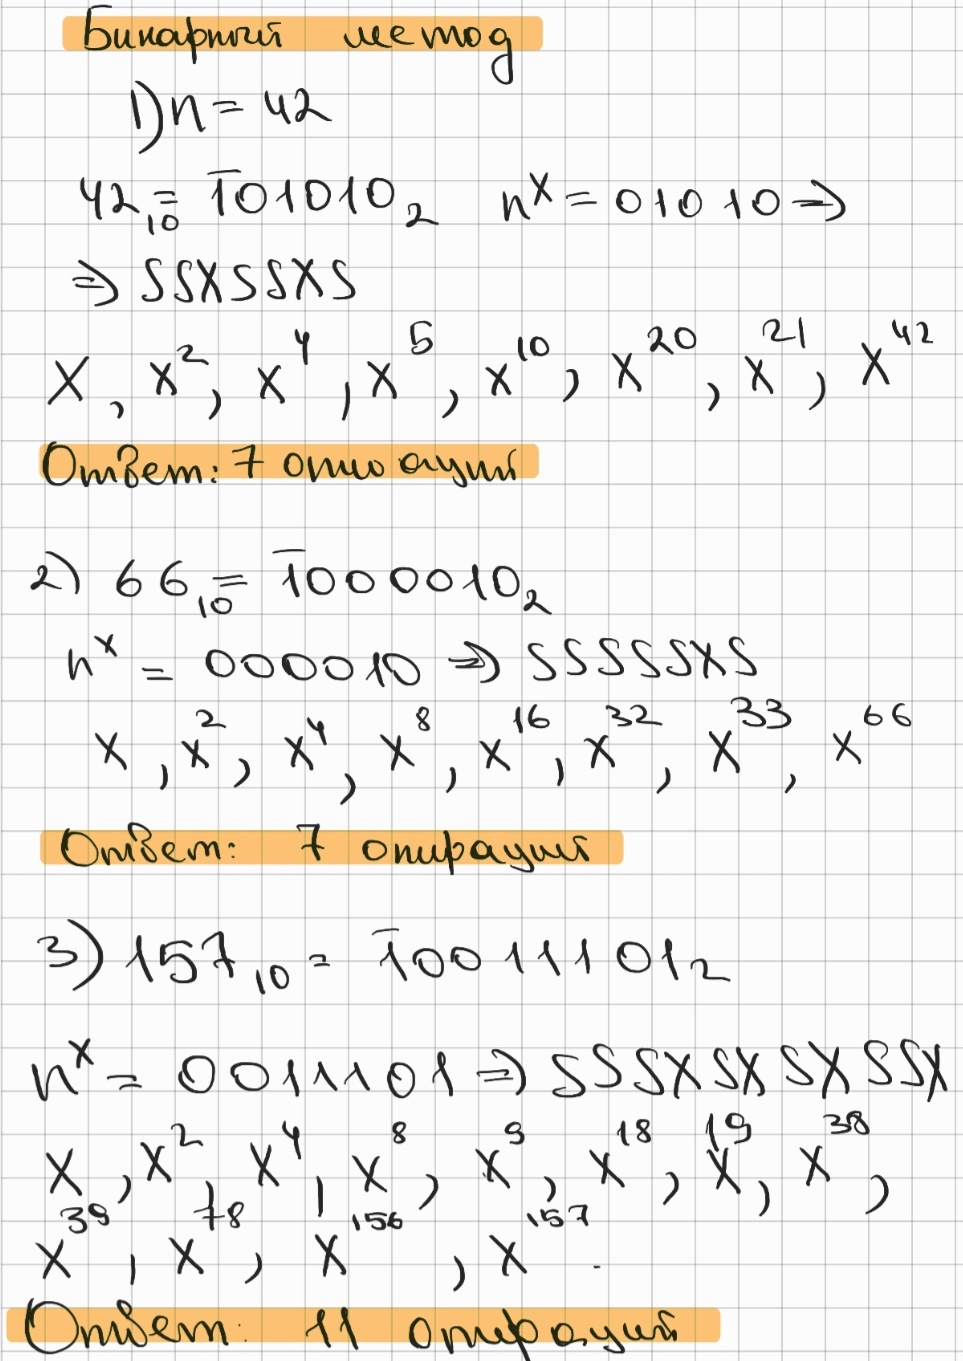

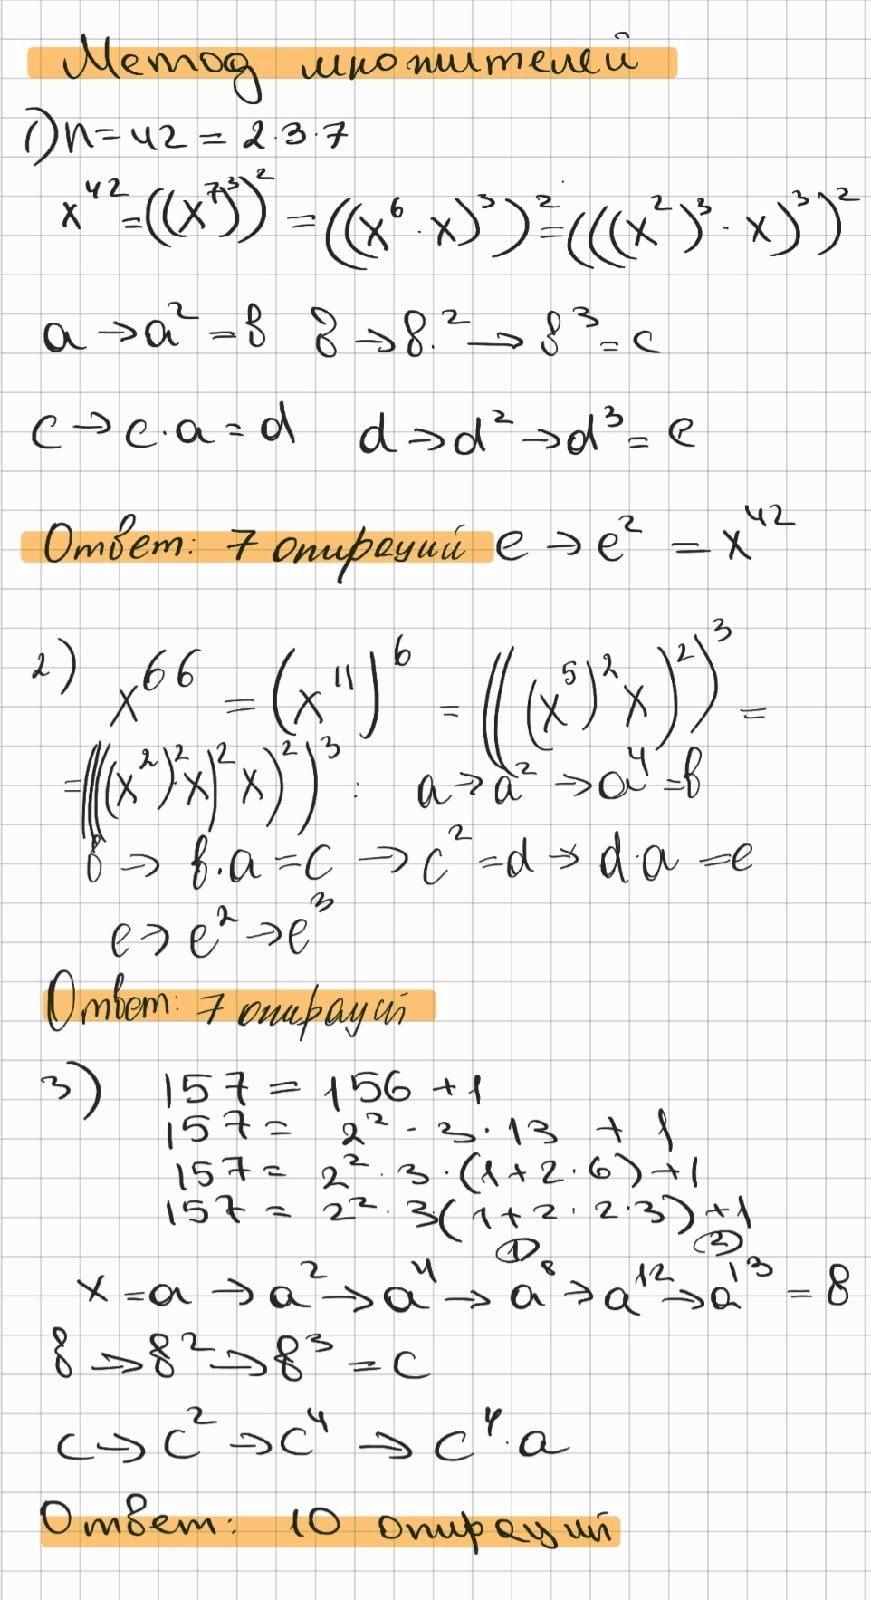

## Номер 2. Алгоритм Яо:

In [7]:
def YAO(a, b):
    shkaf = [] #храним число в системе счесления 2^b и частные 
    tsepochka = []
    A = a
    base = 2**b
    z = [] #храним те числа которые входят запись числа в системе 2^b
    shkaf.append([a, 0]) #добавляем число и ноль в первую строку
    while A >= base: #переводим а в систему счесления
        shkaf.append([A//base, A % base])
        z.append(A % base)
        A //= base 
    z.append(shkaf[len(shkaf) - 1][0])
    power = z #запись числа в системе 
    z = list(set(z)) #удаляем копии
    z.sort()
    print("z =", z)
    d = [] #храним d(z)
    d_z = [] #храним d(z)*z
    for i in z:
        d_i = 0;
        for j in range(0, len(power)):
            if i == power[j]:
                d_i += (2**b)**j
        d.append(d_i)
        d_z.append(d_i*i)
    print("d(z) = ", d)
    print("z*d(z) = ", d_z)
    equal = 0
    for i in d_z:
        equal += i
    print(equal)

In [8]:
a = int(input())
b = int(input())
YAO(a, b)

31415
3
z = [2, 5, 6, 7]
d(z) =  [64, 512, 8, 4097]
z*d(z) =  [128, 2560, 48, 28679]
31415


   Вывод:
   
    31415
    3
    z = [2, 5, 6, 7]
    d(z) =  [64, 512, 8, 4097]
    z*d(z) =  [128, 2560, 48, 28679]
    31415

## Номер 3. Алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа:

In [20]:
def nu(n): #счет длины Хемминга
    n = Integer(n)
    return n.popcount()

In [21]:
def create_part(m, ch_part): #эта штука создает вектор по умолчанию
    vec1 = []
    vec2 = []
    for i in range(1, m + 1):
        if i <= int(ch_part):
            vec1.append(i)
        else:
            vec2.append(i)
    return [vec1, vec2]

In [22]:
def che(vec): #а эта штука - число по вектору
    line = []
    line.append(1)
    for i in range(len(vec)):
        line.append(line[i] + line[vec[i] - 1])
    return line[len(line) - 1]

In [23]:
def dec(vec):#це декрементирует вектор 
    _len = len(vec)
    for i in range(_len):
        if vec[_len - i - 1] > 1:
            vec[_len - i - 1] -= 1
            for j in range(_len - i, _len):
                vec[j] = j + 1
            break

In [24]:
def generate_part(_len, first):#це генерирует часть вектора
    part = [0]*_len
    for i in range(_len):
        part[i] = first + i
    return part

In [25]:
def get_chain(vec):#це генерирует цепочку по вектору
    line = []
    line.append(1)
    for i in range(len(vec)):
        line.append(line[i] + line[vec[i] - 1])
    return line

In [26]:
def dect(vec):# проверка возможности декрементрирования
    for i in vec:
        if i > 1:
            return False
    return True

In [27]:
def vochcyc(n):
    l_min = math.ceil(math.log2(n)) #минимум
    l_max = int(math.log2(n) + nu(n)) #максимум
    for m in range(l_min, l_max):#перебор всех длин векторов
        q = int(m/2)
        vec = create_part(m, q)
        fix = generate_part(q, 1)
        
        while True: # перебор всех возможных фикс частей
            change = generate_part(m - q, q + 1)
            bounds = [0]*2
            a = che(fix)
            bounds[0] = a + m - q
            bounds[1] = a * 2 ** (m - q)

            
            if n < bounds[0] or n > bounds[1]:
                if dect(fix) and len(fix) > 1:
                    break
                dec(fix)
                continue
                
            while True: #перебор меняющихся частей
                if che(fix + change) == n:
                    return fix + change
                if dect(change):
                    break
                dec(change)
            if dect(fix):
                break
            dec(fix)   
    print("неа")

In [32]:
n = int(input())
vova = vochcyc(n)
print("Ваш вектор:  ", vova)
print("Ваша цепочка:", get_chain(vova))

20
Ваш вектор:   [1, 2, 3, 4, 3]
Ваша цепочка: [1, 2, 4, 8, 16, 20]


Вывод: 

    20
    Ваш вектор:   [1, 2, 3, 4, 3]
    Ваша цепочка: [1, 2, 4, 8, 16, 20]

## Номер 4. Гипотеза Шольца-Брауэра:

In [33]:
for i in range(1, 13):
    k = vochcyc(i)
    _k = vochcyc(2**i - 1)
    chain = get_chain(k)
    _chain = get_chain(_k)
    print("Теорема выполнена:", len(_chain) <= i - 1 + len(chain))

Теорема выполнена: True
Теорема выполнена: True
Теорема выполнена: True
Теорема выполнена: True


Вывод:

    Теорема выполнена: True
    Теорема выполнена: True
    Теорема выполнена: True
    Теорема выполнена: True
    Теорема выполнена: True
    Теорема выполнена: True
    Теорема выполнена: True
    Теорема выполнена: True
    Теорема выполнена: True
    Теорема выполнена: True
    Теорема выполнена: True
    Теорема выполнена: True

$n$ | $l^*(n)$ | $l^*(2^n - 1)$ | $Теорема$
--- | --- | --- | --- 
1 | 1 | 1 | Выполнена
2 | 2 | 3 | Выполнена
3 | 3 | 5 | Выполнена
4 | 3 | 6 | Выполнена
5 | 4 | 8 | Выполнена
6 | 4 | 9 | Выполнена
7 | 5 | 11 | Выполнена
8 | 4 | 11 | Выполнена
9 | 5 | 13 | Выполнена
10 | 5 | 14 | Выполнена
11 | 6 | 16 | Выполнена
12 | 5 | 16 | Выполнена

Мини-выводы: 
Полученные цепочки не являются кратчайшими;
Гипотеза Шольца-Брауэра для звездных цепочек при  n∈(1,12)  верна. 

## Выводы
Сформированы представления об аддитивных цепочках, выработаны умения составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, изучен навык использования систем компьютерной математики для реализации алгоритмов.